In [1]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score ,recall_score, roc_auc_score ,f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_it=pd.read_csv("IT_customer_churn.csv")
df_it.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
dfcopy=df_it.copy()

In [5]:
df_it.duplicated().sum()

np.int64(22)

In [6]:
df_it=df_it.drop_duplicates()

In [7]:
df_it.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df_it['TotalCharges'] = pd.to_numeric(df_it['TotalCharges'], errors='coerce')

In [9]:
missing_total_charges_rows = df_it[df_it['TotalCharges'].isnull()]
print(missing_total_charges_rows['tenure'].unique())

[0]


In [10]:
df_it['TotalCharges'].fillna(0, inplace=True)
df_it.isnull().sum()

C:\Users\2021\AppData\Local\Temp\ipykernel_36772\1775909794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_it['TotalCharges'].fillna(0, inplace=True)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df_it.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2286.765026
std,0.368947,24.534965,30.069001,2266.855057
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.750000,403.350000
50%,0.000000,29.000000,70.400000,1400.550000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


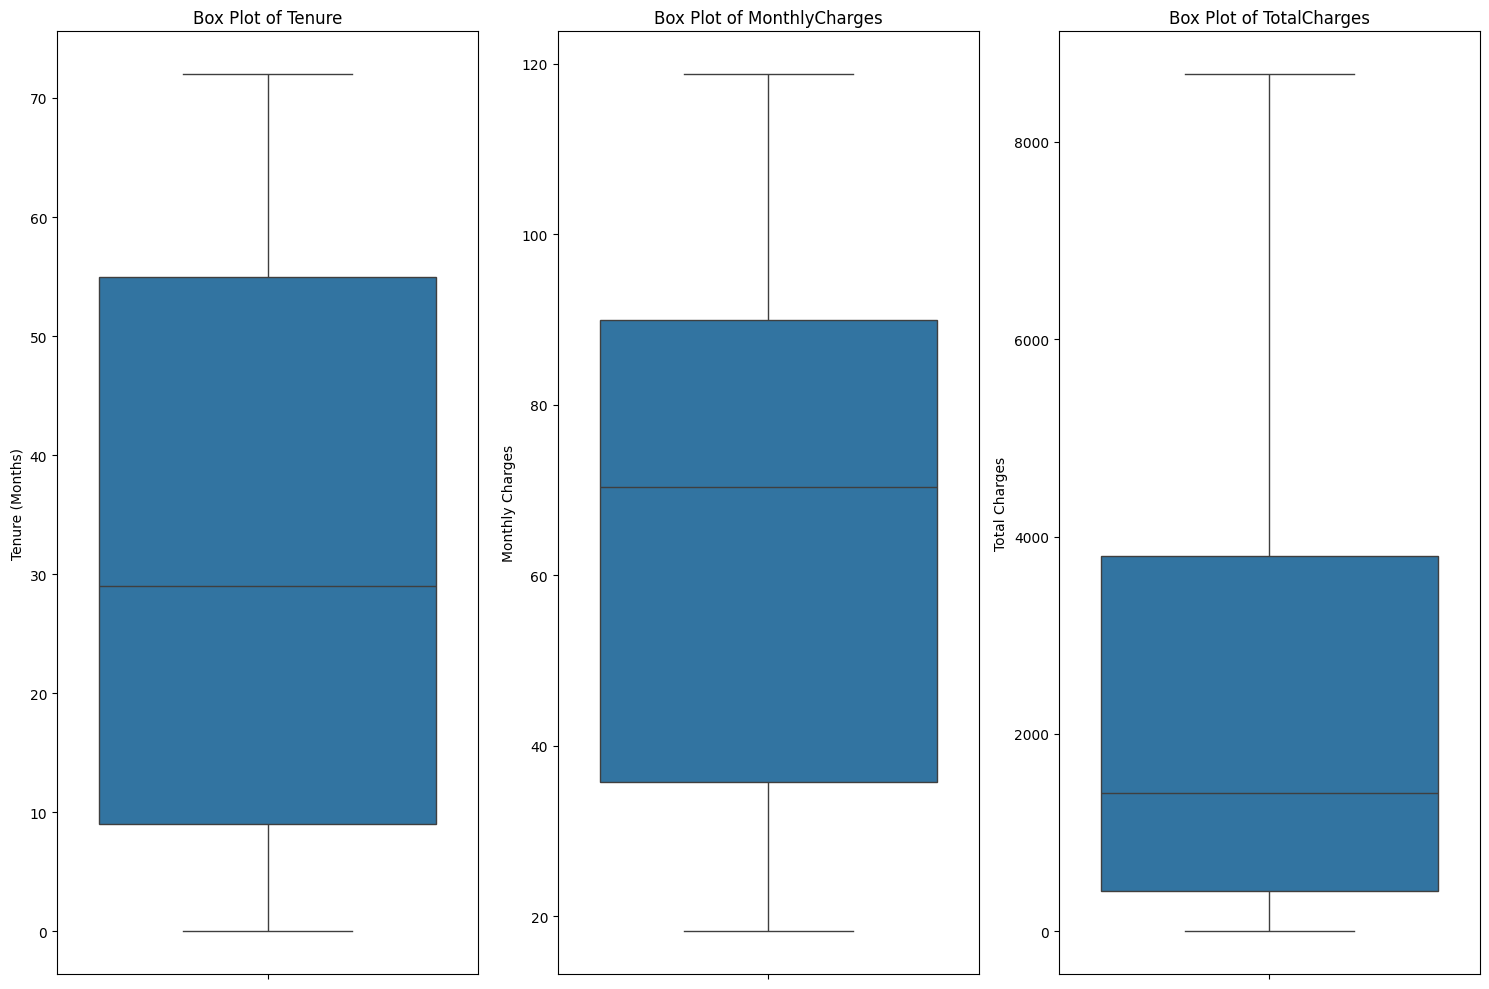

In [12]:
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
sns.boxplot(y=df_it['tenure'])
plt.title('Box Plot of Tenure')
plt.ylabel('Tenure (Months)')
plt.subplot(1,3,2)
sns.boxplot(y=df_it['MonthlyCharges'])
plt.title('Box Plot of MonthlyCharges')
plt.ylabel('Monthly Charges')
plt.subplot(1,3,3)
sns.boxplot(y=df_it['TotalCharges'])
plt.title('Box Plot of TotalCharges')
plt.ylabel('Total Charges')
plt.tight_layout()  
plt.show()

In [13]:
df_it['MultipleLines'].value_counts()

MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [14]:
# convert binary cols into 0,1 cols
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_it[col]=df_it[col].replace({'Yes': 1, 'No': 0}).astype(int)

df_it['gender'] = df_it['gender'].replace({'Female': 0, 'Male': 1}).astype(int)
df_it['Churn'] = df_it['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

categorical_cols_onehot = [
    'InternetService',
    'Contract',
    'PaymentMethod',
    'MultipleLines',
    'OnlineSecurity',    
    'OnlineBackup',      
    'DeviceProtection',   
    'TechSupport',       
    'StreamingTV',       
    'StreamingMovies'    
]

df_it = pd.get_dummies(df_it, columns=categorical_cols_onehot, drop_first=True, dtype=int)
print("First 5 rows after encoding categorical variables (updated for MultipleLines):")
print(df_it.head())
print("\nData types after encoding categorical variables (updated for MultipleLines):")
print(df_it.dtypes)

First 5 rows after encoding categorical variables (updated for MultipleLines):
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                 0           

C:\Users\2021\AppData\Local\Temp\ipykernel_36772\3244714727.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_it[col]=df_it[col].replace({'Yes': 1, 'No': 0}).astype(int)
C:\Users\2021\AppData\Local\Temp\ipykernel_36772\3244714727.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_it[col]=df_it[col].replace({'Yes': 1, 'No': 0}).astype(int)
C:\Users\2021\AppData\Local\Temp\ipykernel_36772\3244714727.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

In [15]:
dfcopy.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
Male    0              No       No          1       Yes           No                No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  No                Mailed check               20.05           20.05         No       3
                                                                                                                                                                                                                                                                                                20.20           20.2          No       3
Female  0         

In [16]:
correlation_matrix=df_it.corr()
print("Correlations with Churn (Sorted):")
print(correlation_matrix['Churn'].sort_values(ascending=False).to_string())

Correlations with Churn (Sorted):
Churn                                    1.000000
InternetService_Fiber optic              0.308170
PaymentMethod_Electronic check           0.301544
MonthlyCharges                           0.194508
PaperlessBilling                         0.190891
SeniorCitizen                            0.151619
StreamingTV_Yes                          0.065032
StreamingMovies_Yes                      0.063192
MultipleLines_Yes                        0.041958
PhoneService                             0.011323
gender                                  -0.008763
MultipleLines_No phone service          -0.011323
DeviceProtection_Yes                    -0.064944
OnlineBackup_Yes                        -0.081092
PaymentMethod_Mailed check              -0.092562
PaymentMethod_Credit card (automatic)   -0.133666
Partner                                 -0.149135
Dependents                              -0.163459
TechSupport_Yes                         -0.163937
OnlineSecurity_Y

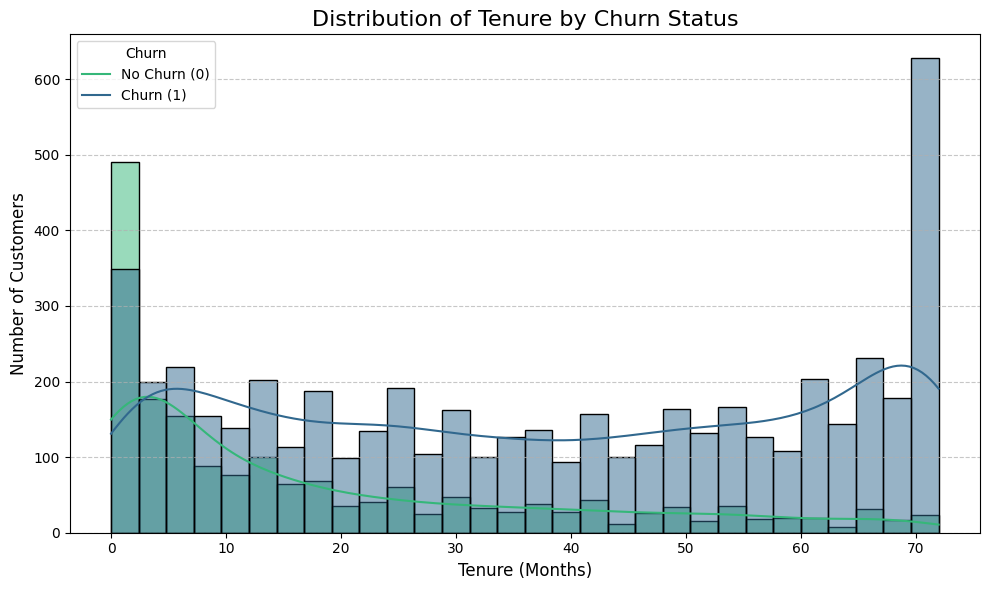

C:\Users\2021\AppData\Local\Temp\ipykernel_36772\3824090807.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_it, palette='viridis')


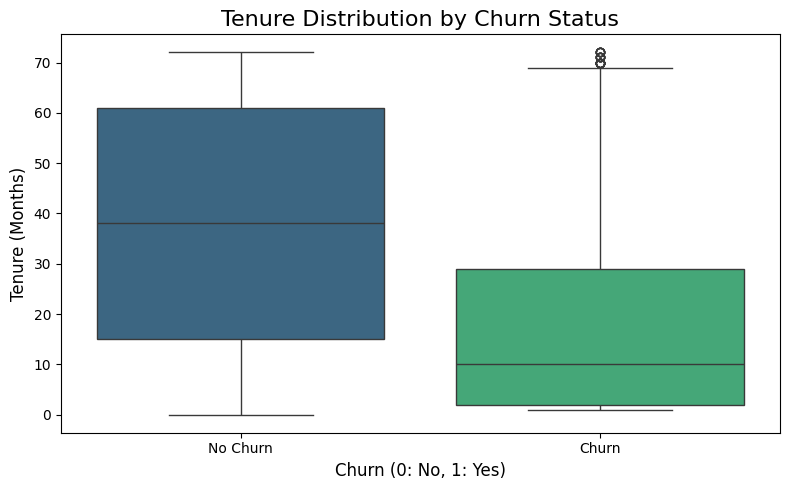

In [17]:


plt.figure(figsize=(10, 6))

sns.histplot(data=df_it, x='tenure', hue='Churn', kde=True, bins=30, palette='viridis')
plt.title('Distribution of Tenure by Churn Status', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', labels=['No Churn (0)', 'Churn (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df_it, palette='viridis')
plt.title('Tenure Distribution by Churn Status', fontsize=16)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.tight_layout()

plt.show()

C:\Users\2021\AppData\Local\Temp\ipykernel_36772\3019439642.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_it[col].value_counts().index, y=df_it.groupby(col)['Churn'].mean(), palette='viridis')
C:\Users\2021\AppData\Local\Temp\ipykernel_36772\3019439642.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_it[col].value_counts().index, y=df_it.groupby(col)['Churn'].mean(), palette='viridis')
C:\Users\2021\AppData\Local\Temp\ipykernel_36772\3019439642.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_it[col].value_count

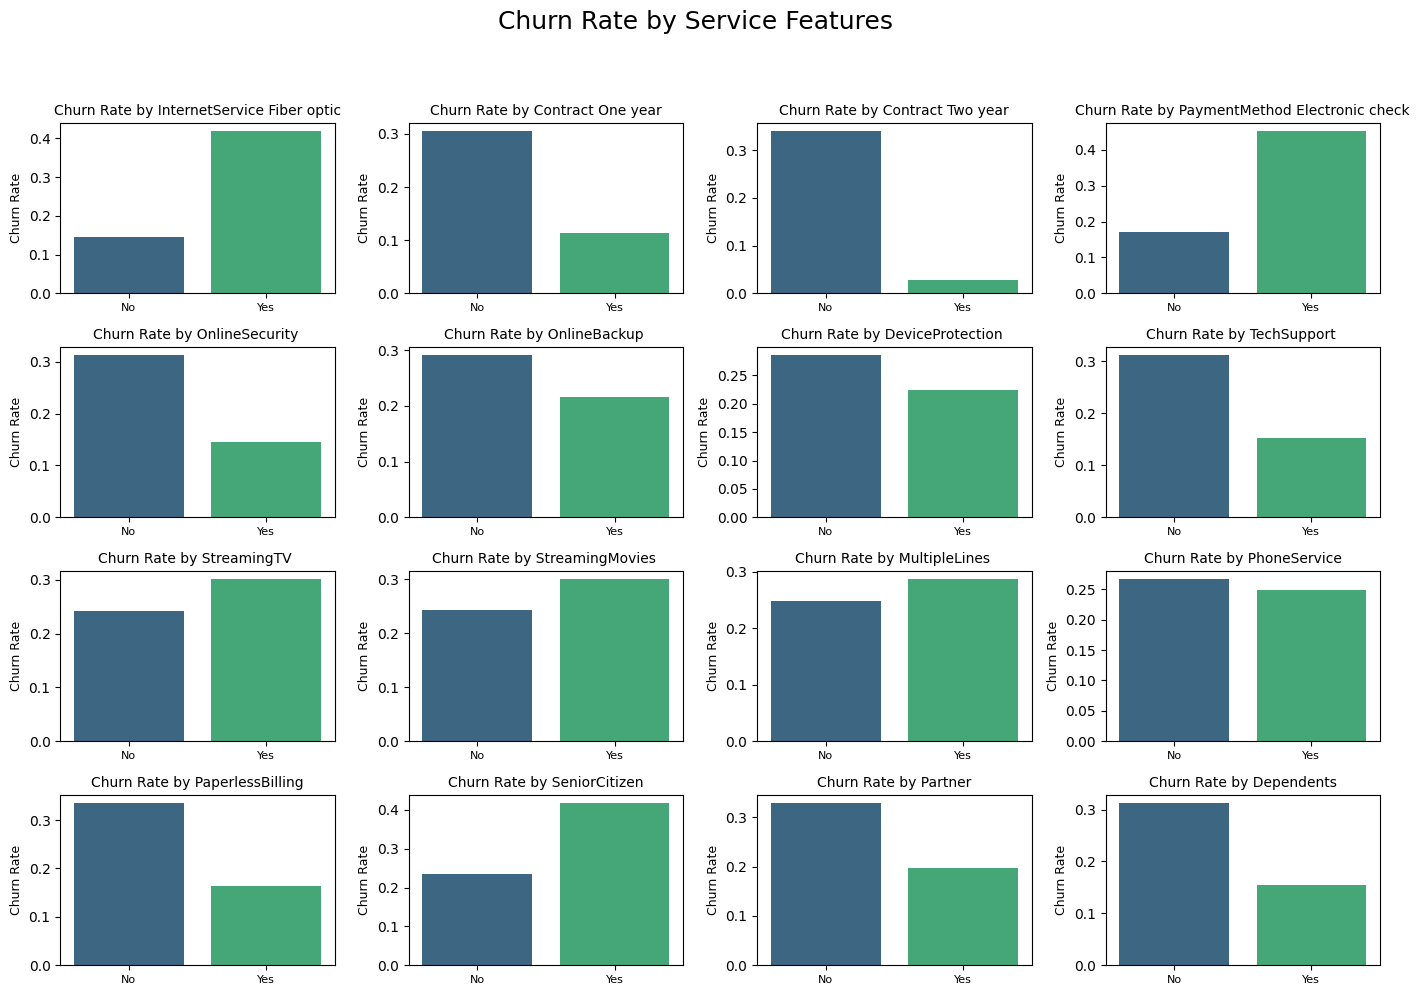


Churn Rates for Key Service Features:
  InternetService Fiber optic: Yes=0.418, No=0.144
  Contract One year: Yes=0.113, No=0.305
  Contract Two year: Yes=0.028, No=0.340
  PaymentMethod Electronic check: Yes=0.451, No=0.170
  OnlineSecurity : Yes=0.146, No=0.312
  OnlineBackup : Yes=0.215, No=0.291
  DeviceProtection : Yes=0.225, No=0.285
  TechSupport : Yes=0.152, No=0.311
  StreamingTV : Yes=0.301, No=0.242
  StreamingMovies : Yes=0.299, No=0.242
  MultipleLines : Yes=0.286, No=0.249
  PhoneService: Yes=0.266, No=0.249
  PaperlessBilling: Yes=0.334, No=0.163
  SeniorCitizen: Yes=0.416, No=0.235
  Partner: Yes=0.197, No=0.328
  Dependents: Yes=0.155, No=0.312

Overall Churn Rate: 0.264

Services / Features with noticeably higher churn rate than overall average:
- InternetService Fiber optic (Yes): 0.418
- PaymentMethod Electronic check (Yes): 0.451
- PaperlessBilling (Yes): 0.334
- SeniorCitizen (Yes): 0.416


In [18]:


churn_rate_analysis_cols = [
    'InternetService_Fiber optic', 
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Electronic check', 
    
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes',
    'MultipleLines_Yes',
    'PhoneService', 
    'PaperlessBilling', 
    'SeniorCitizen',
    'Partner',
    'Dependents'
]

plt.figure(figsize=(14, 10))
plt.suptitle('Churn Rate by Service Features', fontsize=18, y=1.02) 

for i, col in enumerate(churn_rate_analysis_cols):
    plt.subplot(4, 4, i + 1) 
    sns.barplot(x=df_it[col].value_counts().index, y=df_it.groupby(col)['Churn'].mean(), palette='viridis')
    plt.title(f'Churn Rate by {col.replace("_", " ").replace("Yes", "")}', fontsize=10)
    plt.xlabel('') 
    plt.ylabel('Churn Rate', fontsize=9)
    plt.xticks([0, 1], ['No', 'Yes'], fontsize=8) 

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) 

plt.show()

print("\nChurn Rates for Key Service Features:")
for col in churn_rate_analysis_cols:
    if len(df_it[col].value_counts()) == 2:
        churn_rate_yes = df_it.groupby(col)['Churn'].mean().get(1, 0)
        churn_rate_no = df_it.groupby(col)['Churn'].mean().get(0, 0)
        print(f"  {col.replace('_', ' ').replace('Yes', '')}: Yes={churn_rate_yes:.3f}, No={churn_rate_no:.3f}")
    else: 
        print(f"  {col.replace('_', ' ')}:\n{df_it.groupby(col)['Churn'].mean().to_string()}")


overall_churn_rate = df_it['Churn'].mean()
print(f"\nOverall Churn Rate: {overall_churn_rate:.3f}")

print("\nServices / Features with noticeably higher churn rate than overall average:")
for col in churn_rate_analysis_cols:
    if col in df_it.columns: 
        if len(df_it[col].value_counts()) == 2:
            churn_rate_yes = df_it.groupby(col)['Churn'].mean().get(1, 0)
            if churn_rate_yes > overall_churn_rate + 0.05: 
                print(f"- {col.replace('_', ' ').replace('Yes', '')} (Yes): {churn_rate_yes:.3f}")

In [19]:
from sklearn.model_selection import train_test_split
X = df_it.drop('Churn', axis=1) 
y = df_it['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nChurn distribution in original data (y):")
print(y.value_counts(normalize=True))
print("\nChurn distribution in training set (y_train):")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in test set (y_test):")
print(y_test.value_counts(normalize=True))

Shape of X_train: (5616, 30)
Shape of X_test: (1405, 30)
Shape of y_train: (5616,)
Shape of y_test: (1405,)

Churn distribution in original data (y):
Churn
0    0.735508
1    0.264492
Name: proportion, dtype: float64

Churn distribution in training set (y_train):
Churn
0    0.735577
1    0.264423
Name: proportion, dtype: float64

Churn distribution in test set (y_test):
Churn
0    0.735231
1    0.264769
Name: proportion, dtype: float64


In [20]:

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score




model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = {}

print("Performing Cross-Validation on Logistic Regression Model...")
for metric in scoring_metrics:
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=metric)
    cv_results[metric] = scores
    print(f"{metric.capitalize()} scores for each fold: {scores}")
    print(f"Average {metric.capitalize()} across folds: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

print("\nCross-Validation Results Summary:")
for metric, scores in cv_results.items():
    print(f"- {metric.capitalize()}: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}")


model.fit(X_train, y_train)
print("\nModel trained on the full training set.")


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 

print("\nEvaluation on Hold-out Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Performing Cross-Validation on Logistic Regression Model...


Accuracy scores for each fold: [0.8158363  0.8032057  0.79608192 0.82101514 0.78183437]
Average Accuracy across folds: 0.8036 (+/- 0.0280)
Precision scores for each fold: [0.68292683 0.652      0.64529915 0.69047619 0.6023622 ]
Average Precision across folds: 0.6546 (+/- 0.0627)
Recall scores for each fold: [0.56565657 0.54882155 0.50841751 0.58585859 0.51515152]
Average Recall across folds: 0.5448 (+/- 0.0589)
F1 scores for each fold: [0.61878453 0.59597806 0.56873823 0.63387978 0.5553539 ]
Average F1 across folds: 0.5945 (+/- 0.0589)
Roc_auc scores for each fold: [0.86597942 0.8335188  0.84010403 0.86096233 0.82408223]
Average Roc_auc across folds: 0.8449 (+/- 0.0321)

Cross-Validation Results Summary:
- Accuracy: Mean = 0.8036, Std = 0.0140
- Precision: Mean = 0.6546, Std = 0.0313
- Recall: Mean = 0.5448, Std = 0.0295
- F1: Mean = 0.5945, Std = 0.0295
- Roc_auc: Mean = 0.8449, Std = 0.0161

Model trained on the full training set.

Evaluation on Hold-out Test Set:
Accuracy: 0.8014
Pr

Performing Cross-Validation on Random Forest Classifier Model...
Accuracy scores for each fold: [0.80427046 0.79608192 0.7809439  0.80854853 0.79162956]
Average Accuracy across folds: 0.7963 (+/- 0.0194)
Precision scores for each fold: [0.67111111 0.66037736 0.62085308 0.69158879 0.64125561]
Average Precision across folds: 0.6570 (+/- 0.0487)
Recall scores for each fold: [0.50841751 0.47138047 0.44107744 0.4983165  0.48148148]
Average Recall across folds: 0.4801 (+/- 0.0468)
F1 scores for each fold: [0.57854406 0.55009823 0.51574803 0.57925636 0.55      ]
Average F1 across folds: 0.5547 (+/- 0.0468)
Roc_auc scores for each fold: [0.85027013 0.81690594 0.81688149 0.83942533 0.81340035]
Average Roc_auc across folds: 0.8274 (+/- 0.0295)

Random Forest Cross-Validation Results Summary:
- Accuracy: Mean = 0.7963, Std = 0.0097
- Precision: Mean = 0.6570, Std = 0.0243
- Recall: Mean = 0.4801, Std = 0.0234
- F1: Mean = 0.5547, Std = 0.0234
- Roc_auc: Mean = 0.8274, Std = 0.0147

Random Forest 

C:\Users\2021\AppData\Local\Temp\ipykernel_36772\3048887054.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sorted.head(15).values, y=feature_importances_sorted.head(15).index, palette='viridis')


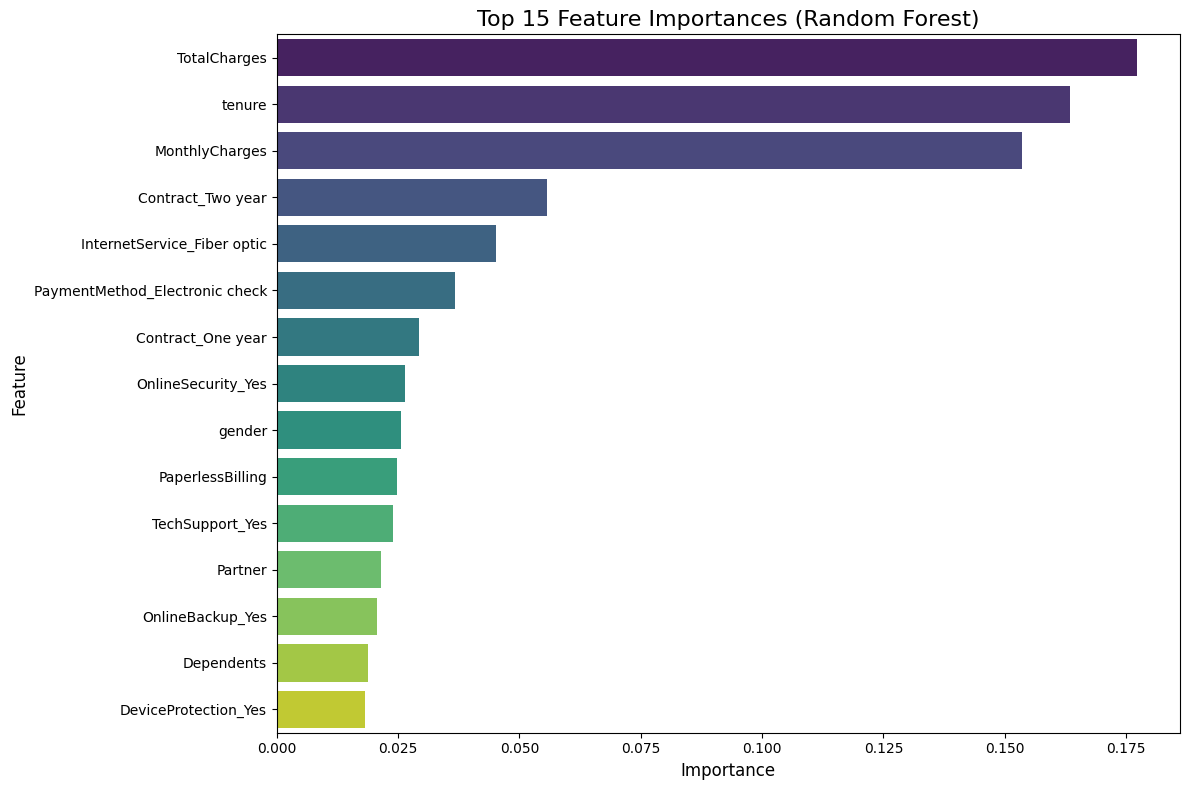

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_rf = {}

print("Performing Cross-Validation on Random Forest Classifier Model...")
for metric in scoring_metrics:
    
    scores = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring=metric)
    cv_results_rf[metric] = scores
    print(f"{metric.capitalize()} scores for each fold: {scores}")
    print(f"Average {metric.capitalize()} across folds: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

print("\nRandom Forest Cross-Validation Results Summary:")
for metric, scores in cv_results_rf.items():
    print(f"- {metric.capitalize()}: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}")


model_rf.fit(X_train, y_train)
print("\nRandom Forest Model trained on the full training set.")


y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1] 

print("\nRandom Forest Evaluation on Hold-out Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")



print("\nFeature Importances from Random Forest:")
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)


print(feature_importances_sorted.head(15).to_string())


plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_sorted.head(15).values, y=feature_importances_sorted.head(15).index, palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('random_forest_feature_importances.png')
plt.show()

In [22]:

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, loguniform


model_lr = LogisticRegression(random_state=42, max_iter=2000) 


param_distributions_lr = {
    'C': loguniform(0.001, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'], 
    'class_weight': ['balanced'] 
}


cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


random_search_lr = RandomizedSearchCV(estimator=model_lr,
                                      param_distributions=param_distributions_lr,
                                      n_iter=100, # عدد مرات التجربة العشوائية
                                      cv=cv_folds,
                                      scoring='roc_auc',
                                      random_state=42,
                                      verbose=1,
                                      n_jobs=-1)

print("Starting RandomizedSearchCV for Logistic Regression...")

random_search_lr.fit(X_train, y_train)

print("\nBest parameters found by RandomizedSearchCV:")
print(random_search_lr.best_params_)
print(f"Best ROC AUC score from RandomizedSearchCV (CV): {random_search_lr.best_score_:.4f}")


best_lr_model = random_search_lr.best_estimator_

y_pred_best_lr = best_lr_model.predict(X_test)
y_pred_proba_best_lr = best_lr_model.predict_proba(X_test)[:, 1] 

print("\nEvaluation of Best Logistic Regression Model on Hold-out Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_lr):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_best_lr):.4f}")

Starting RandomizedSearchCV for Logistic Regression...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters found by RandomizedSearchCV:
{'C': np.float64(63.95288218539363), 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC score from RandomizedSearchCV (CV): 0.8461

Evaluation of Best Logistic Regression Model on Hold-out Test Set:
Accuracy: 0.7402
Precision: 0.5061
Recall: 0.7823
F1-Score: 0.6146
ROC AUC Score: 0.8398


Starting RandomizedSearchCV for Random Forest Classifier...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits

Best parameters found by RandomizedSearchCV for Random Forest:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 35, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 14, 'n_estimators': 328}
Best ROC AUC score from RandomizedSearchCV (CV) for Random Forest: 0.8485

Evaluation of Best Random Forest Model on Hold-out Test Set:
Accuracy: 0.7665
Precision: 0.5440
Recall: 0.7312
F1-Score: 0.6239
ROC AUC Score: 0.8418

Feature Importances from Best Random Forest Model:
tenure                                 0.165366
TotalCharges                           0.142830
Contract_Two year                      0.109649
MonthlyCharges                         0.096311
InternetService_Fiber optic            0.074976
PaymentMethod_Electronic check         0.048170
Contract_One year                      0.038345
OnlineSecurity_Yes                  

C:\Users\2021\AppData\Local\Temp\ipykernel_36772\4093968664.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_tuned_rf_sorted.head(15).values, y=feature_importances_tuned_rf_sorted.head(15).index, palette='viridis')


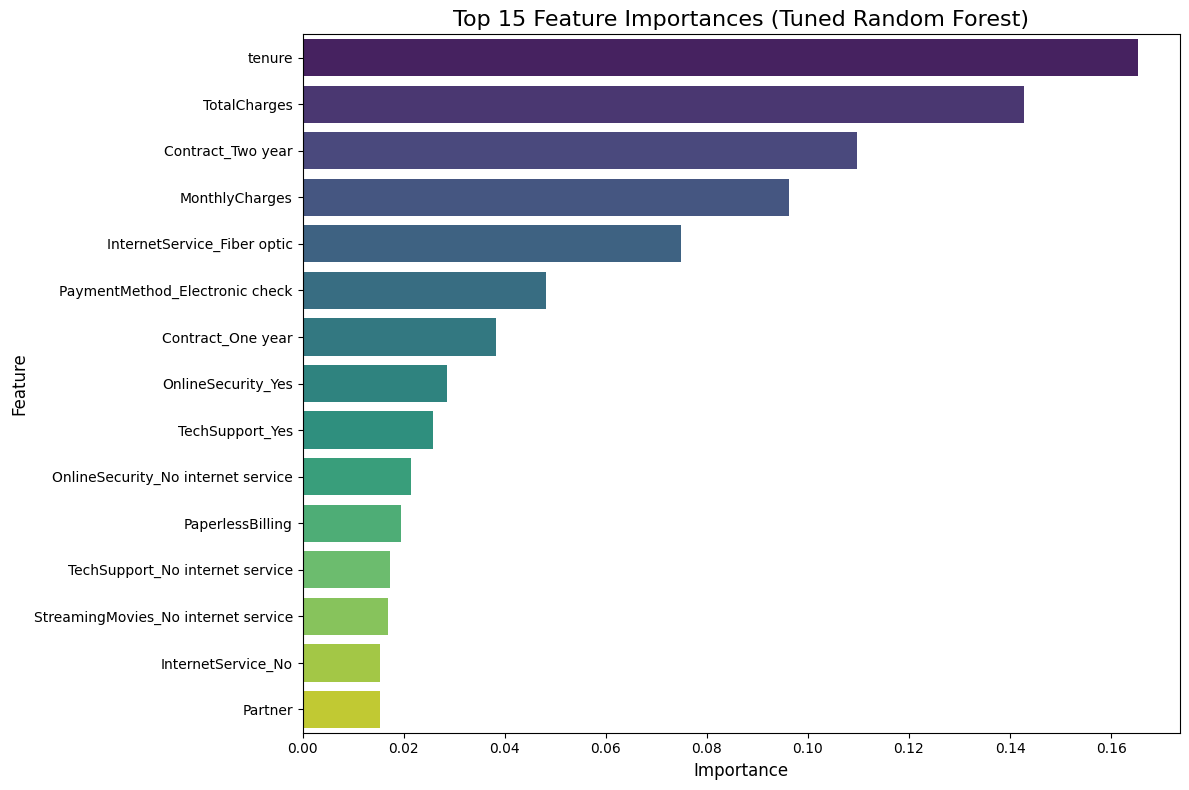

In [ ]:
from scipy.stats import randint, uniform



model_rf_tuned = RandomForestClassifier(random_state=42)


param_distributions_rf = {
    'n_estimators': randint(100, 500), 
    'max_features': ['sqrt', 'log2', 0.6, 0.8, 1.0], 
    'max_depth': randint(10, 100), 
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 10), 
    'criterion': ['gini', 'entropy'], 
    'class_weight': ['balanced'] 
}


cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


random_search_rf = RandomizedSearchCV(estimator=model_rf_tuned,
                                      param_distributions=param_distributions_rf,
                                      n_iter=200,
                                      cv=cv_folds,
                                      scoring='roc_auc',
                                      random_state=42,
                                      verbose=1,
                                      n_jobs=-1)

print("Starting RandomizedSearchCV for Random Forest Classifier...")

random_search_rf.fit(X_train, y_train)

print("\nBest parameters found by RandomizedSearchCV for Random Forest:")
print(random_search_rf.best_params_)
print(f"Best ROC AUC score from RandomizedSearchCV (CV) for Random Forest: {random_search_rf.best_score_:.4f}")


best_rf_model = random_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("\nEvaluation of Best Random Forest Model on Hold-out Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_best_rf):.4f}")


print("\nFeature Importances from Best Random Forest Model:")
feature_importances_tuned_rf = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)
feature_importances_tuned_rf_sorted = feature_importances_tuned_rf.sort_values(ascending=False)

print(feature_importances_tuned_rf_sorted.head(15).to_string())


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_tuned_rf_sorted.head(15).values, y=feature_importances_tuned_rf_sorted.head(15).index, palette='viridis')
plt.title('Top 15 Feature Importances (Tuned Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('tuned_random_forest_feature_importances.png')
plt.show()


Recommendations


1- Focus on customer tenure, total charges, and monthly charges:
The significant impact of each of these factors on customer churn, especially for new customers, warrants special attention for new customers or customers with high monthly charges but low total charges, as they are the most vulnerable to churn.

2- Importance of contract type:
It can be noted that customers with short-term contracts are more vulnerable to churn. The attractiveness of long-term contracts can be increased as the company deems appropriate.

3- Fiber optic cable service:
Although the service is advanced and supposed to be an attractive factor, it poses a serious risk of churn. The quality of the service, its prices, the competitive market, as well as the maintenance and associated services should be reviewed.

It may be best to study the entire service to identify the causes of the discrepancy.

4- Electronic Checks as a Payment Method:
The results demonstrate that this service is associated with an increased dropout rate. This requires further study to determine the reason for this association, whether there is a problem with the service, the suitability of alternative services, and whether alternatives exist and should be encouraged.

5- Online Security and Technical Support Services:
Customers who subscribe to security and technical support services are less likely to drop out. These services should be encouraged more, and awareness of their importance should be raised.

6- Balancing Recall and Precision in Intervention:

Our model achieved a very high Recall (0.78) compared to Precision (0.51).

Recommendation: This means that the company will detect 78% of customers who will actually drop out, which is excellent. However, approximately 49% of customers predicted to drop out by the model will not actually drop out (false alarms). An intervention strategy (such as phone calls or special offers) should be designed to be cost-effective, as it will be applied to a significant number of customers who will not churn. A company can focus on low-cost interventions for false alarms (such as emails or text messages) and allocate more expensive interventions (such as personal calls or significant discounts) to customers with a very high churn probability based on the model's predicted likelihood score.